In [37]:
#install.packages('randomForest')
library(readxl)
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('dplyr')
library(dplyr)
#install.packages('caret')
library(Rcpp)
library(caret)
library(rpart)
#install.packages('tree')
library(tree)
#install.packages('multcomp')
library(multcomp)
#install.packages('party')
library(party)
library(tree)


# FA (weighted) Classifcation

In [54]:
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.explore =read_excel( '../../results/df-exp.xlsx' ,sheet=1)
df.cluster = read_excel("../../results/df-fa-cluster-rank.xlsx" ,sheet=1)
df.wb = read_excel("../../results/df-wb.xlsx" ,sheet=1 )
df.explore$clusters <- as.factor(df.cluster$clusters)
df <- df.explore

ERROR: Error in hist.default(df$clusters): 'x' must be numeric


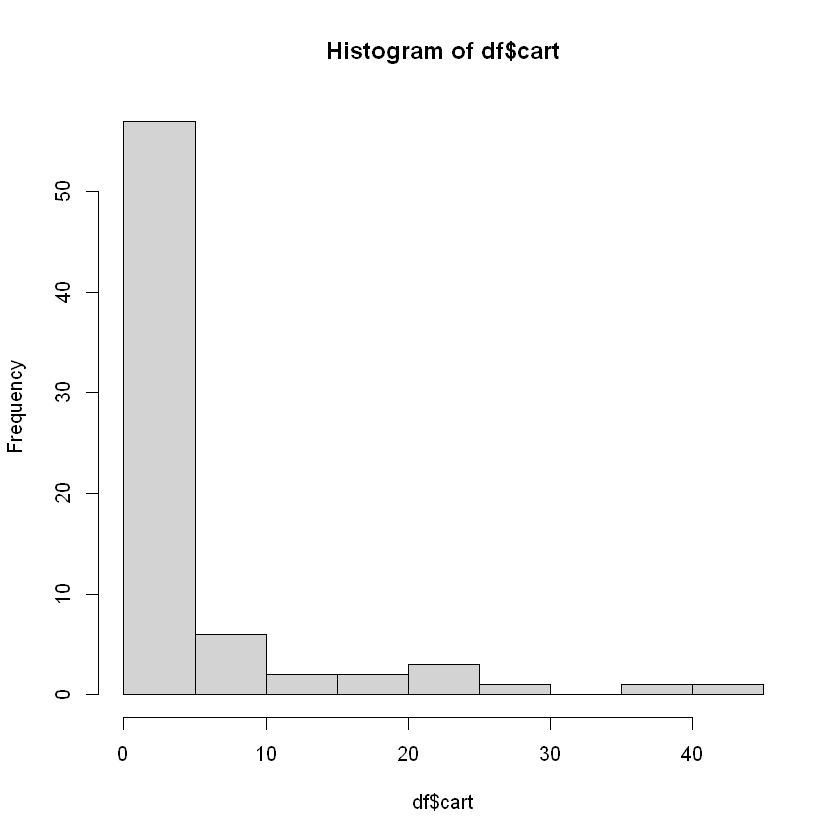

In [55]:
hist(df$cart)
hist(df$clusters)

In [66]:
tree.wa = tree(clusters ~ . - Country  , data = df)

In [67]:
summary(tree.wa) 


Classification tree:
tree(formula = clusters ~ . - Country, data = df)
Variables actually used in tree construction:
[1] "mori" "popd" "mcyc" "pcar" "bicy" "lita" "land"
Number of terminal nodes:  10 
Residual mean deviance:  1.376 = 86.69 / 63 
Misclassification error rate: 0.2466 = 18 / 73 

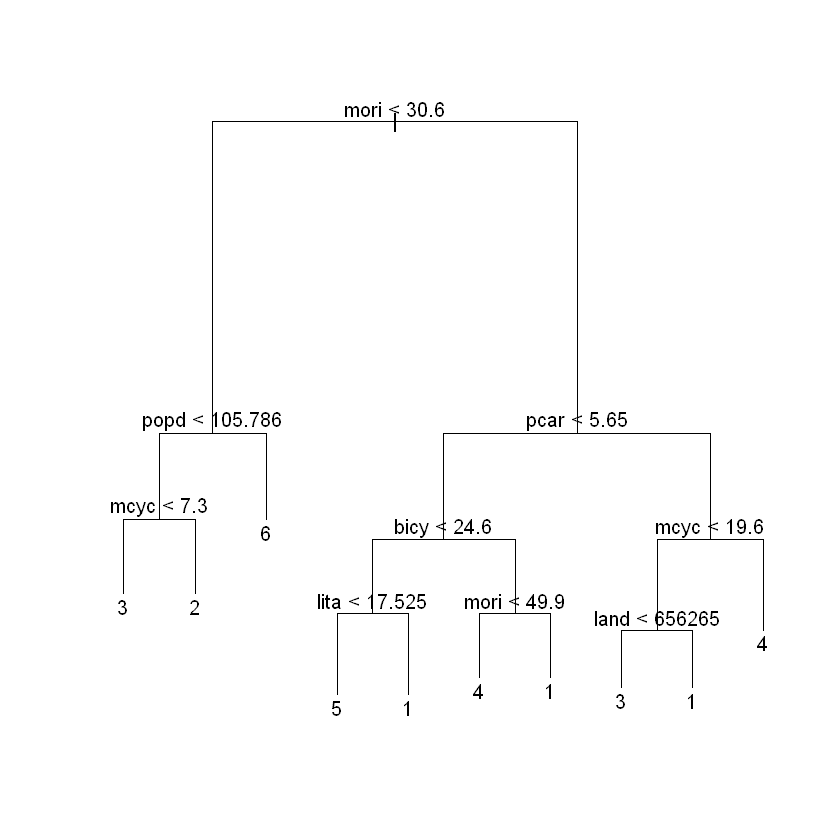

In [68]:
plot(tree.wa)
text(tree.wa, pretty = 0) #population density High density for six cluster group.

In [59]:
importance(tree.wa)

ERROR: Error in UseMethod("importance"): no applicable method for 'importance' applied to an object of class "tree"


In [43]:
tree.wa

node), split, n, deviance, yval
      * denotes terminal node

 1) root 73 186.700 3.178  
   2) popd < 106.474 48  89.250 2.625  
     4) land < 574215 29  46.690 3.103  
       8) popd < 93.1604 24  27.960 3.458  
        16) bicy < 29.5 18  12.500 3.167  
          32) wigc < 0.35 13   5.692 2.846 *
          33) wigc > 0.35 5   2.000 4.000 *
        17) bicy > 29.5 6   9.333 4.333 *
       9) popd > 93.1604 5   1.200 1.400 *
     5) land > 574215 19  25.790 1.895  
      10) tpop < 5.16847e+007 14   7.500 1.500  
        20) mori < 47.8 5   1.200 2.400 *
        21) mori > 47.8 9   0.000 1.000 *
      11) tpop > 5.16847e+007 5  10.000 3.000 *
   3) popd > 106.474 25  54.560 4.240  
     6) mori < 29.85 9  14.000 5.333 *
     7) mori > 29.85 16  23.750 3.625  
      14) upop < 39.184 10   3.600 4.200 *
      15) upop > 39.184 6  11.330 2.667 *

In [79]:
set.seed(101)
train = sample(1:nrow(df), 73)
head(train)

[1] 73 57 46 58 61 60

In [80]:
rf.water = randomForest(clusters~. -Country, data = df, subset = train)
rf.water


Call:
 randomForest(formula = clusters ~ . - Country, data = df, subset = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 57.53%
Confusion matrix:
  1 2  3 4 5 6 class.error
1 7 0  5 4 0 0   0.5625000
2 0 3  4 0 0 0   0.5714286
3 2 1 15 2 0 2   0.3181818
4 5 0  3 2 2 1   0.8461538
5 2 0  1 1 2 0   0.6666667
6 0 2  4 1 0 2   0.7777778

In [81]:
oob.err = double(13)
test.err = double(13)
for(mtry in 1:13){
  fit = randomForest(clusters~. -Country, data = df, subset=train, mtry=mtry, ntree = 350)
  oob.err[mtry] = fit$mse[350]
  pred = predict(fit, df[-train,])
  test.err[mtry] = with(df[-train,], mean( (clusters-pred)^2 ))
}

ERROR: Error in oob.err[mtry] <- fit$mse[350]: replacement has length zero


In [78]:
matplot(1:mtry, cbind(test.err, oob.err), pch = 23, col = c("red", "blue"), type = "b", ylab="Mean Squared Error")
legend("topright", legend = c("OOB", "Test"), pch = 23, col = c("red", "blue"))

ERROR: Error in matplot(1:mtry, cbind(test.err, oob.err), pch = 23, col = c("red", : 'x' and 'y' must have same number of rows


In [82]:
summary(rf.water)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted         73   factor numeric  
err.rate        3500   -none- numeric  
confusion         42   -none- numeric  
votes            438   matrix numeric  
oob.times         73   -none- numeric  
classes            6   -none- character
importance        14   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                 73   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [83]:
importance(rf.water, sort = TRUE)

,MeanDecreaseGini
bicy,3.638402
cart,3.031376
mcyc,4.729427
pcar,5.840664
boat,2.528568
wigc,2.760126
cgdp,3.896986
tpop,4.399770
upop,5.199674
popd,5.039859


ERROR: Error in xy.coords(x, y, recycle = TRUE, setLab = FALSE): 'x' is a list, but does not have components 'x' and 'y'


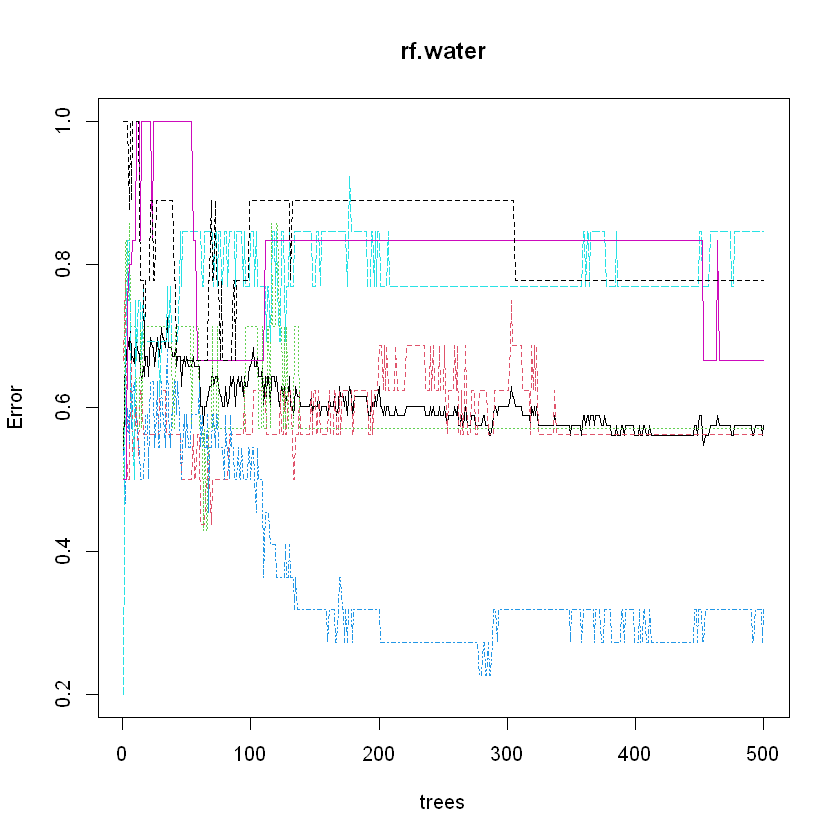

In [84]:
plot(rf.water)
text(rf.water, pretty = 0)